In [113]:
import random
import pandas as pd
import numpy as np
import scanpy as sc
from scipy import signal
import matplotlib.pyplot

def get_normed_and_zero_filtered_data(filename):
    # TODO perhaps include other normalization options
    df = pd.read_csv(filename, sep = '\t', index_col = 0)
    df = df / df.mean()
    df = df.loc[df.sum(axis=1) != 0,:]
    df = (df
          .assign(sum=df.sum(axis=1))
          .sort_values(by='sum', ascending=False)
          .drop('sum', axis = 1)
         )
    return df

def get_s745_time(names):
    return [float(el.split('_')[1]) for el in names]

def get_s814_time(names):
    return [ 6.25 * float(el.split('_')[0][-2:]) for el in names]

def get_periodgram(sc_data):
    return [signal.periodogram(sc_data.X[:,i]) for i in range(sc_data.shape[1])]

def plot_one_row_line(df, row_num):
    df.iloc[row_num,:].plot.line()
    
def plot_one_row_scatter(df, row_num, time):
    matplotlib.pyplot.scatter(df.iloc[row_num,:], time)
      


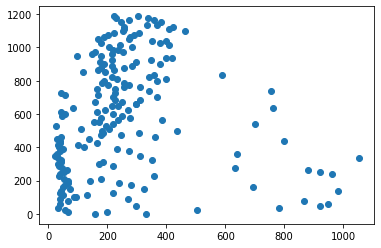

In [114]:
s745_df = get_normed_and_zero_filtered_data("data/sub_0745_miRNA.ec.tab")
s745_time = get_s745_time(s745_df.columns)
s814_df = get_normed_and_zero_filtered_data("data/sub_0814_miRNA.ec.tab")

plot_one_row_scatter(s745_df, 1,s745_time )


In [115]:
 
s814_adata = sc.read("data/sub_0814_miRNA.ec.tab").T

s814_adata.obs['time'] = get_s814_time(s814_adata.obs.index)

sc.pp.normalize_total(s814_adata, target_sum=1e6, exclude_highly_expressed=True)
sc.pp.log1p(s814_adata)
sc.pp.filter_genes(s814_adata, min_counts=1)

sc.pp.highly_variable_genes(s814_adata, n_top_genes=50)
# sc.pl.highest_expr_genes(s814_adata, n_top=30, )


s814_pd = get_periodgram(s814_adata[:,s814_adata.var.highly_variable]) 
s814_pd_array = np.array([i[1] for i in s814_pd])
#print(s814_pd_array.shape[0])



In [116]:

def dist(x, y):
    return (x-y).T@(x-y)


"""
    this implementation of k-means takes as input (i) a matrix pd
    with the data points as columns (ii) an integer K representing the number 
    of clusters, and returns (i) a matrix with the K columns representing 
    the cluster centers 
    """
def k_means_from_pd_data(pd, K, maxIters = 30):

    pd_transpose = pd.T
    centroids = pd[np.random.choice(pd_transpose.shape[0], K)]
    for i in range(maxIters):
        # Cluster Assignment step
        C = np.array([np.argmin([dist(x_i, y_k) for y_k in centroids]) for x_i in pd])
        # Update centroids step
        for k in range(K):
            if (C == k).any():
                centroids[k] = pd[C == k].mean(axis = 0) 
            else: # if there are no data points assigned to this certain centroid
                centroids[k] = pd[np.random.choice(len(pd))] 
    return centroids.transpose()

   
    
    """
    inds = random.sample([i for i in range(50)])
    centroids = [pd[i][1] for i in inds]
    membership = {}
    for pd_i in pd:
        membership[i]=None
        min_dist = 99999999999999
        for centroid in centroids:
            dist = (pd_i[1]- centroid).norm()
            if dist < min_dist:
                dist = min_dist
                membership[i] = centroid
    # recalculate centroids:
    centroids = [np.zeros(size(centroid)) for el in centroids]
    centroid_count = {i:0 for i in range(k)}
    for i, pd_i in enumerate(pd):
        centroids[membership[i]] += pd_i[1]
        centroid_count[membership[i]] 
    """
    




In [117]:
centroids_10 = k_means_from_pd_data(s814_pd_array,10)
print('centroids = \n', centroids_10)

centroids = 
 [[1.48029744e-12 2.36847597e-13 6.31346863e-13 1.90746890e-14
  2.85075674e-12 1.58391805e-15 8.30773330e-13 1.14492129e-12
  3.35534081e-15 1.71716981e-12]
 [2.66755463e+02 6.87603474e+00 6.15288591e+00 1.41133368e+00
  2.81935358e+00 1.94272250e-01 6.03191912e-01 2.09748125e+00
  1.47803462e+00 3.81075592e+01]
 [7.75980911e+01 4.21837986e-01 3.52315664e+00 2.63189745e+00
  7.37103343e-01 3.02347839e-01 4.68191236e-01 1.76460111e+00
  3.41758251e-01 1.06597261e+01]
 [4.89475727e-01 1.13053179e+00 5.40085506e+00 1.61730707e+00
  5.75078368e-01 2.38379389e-01 2.85900593e-01 2.32746053e+00
  1.97642967e-01 4.42511797e+00]
 [7.24994802e+00 2.21535707e+00 2.48420024e+00 1.28648376e+00
  1.79061079e+00 2.56417036e-01 3.14239144e-01 2.89420605e+00
  1.92152426e-01 4.44274950e+00]
 [1.22641563e+01 3.88404989e+00 1.26793301e+00 1.58288980e+00
  8.94370854e-01 1.59887999e-01 6.40063703e-01 1.26832700e+00
  3.67662817e-01 3.33525014e+00]
 [1.14321232e+00 3.15888882e+00 2.48813009e+

In [118]:
s814_pd.shape
np.log(s814_pd[1][1]+1)



AttributeError: 'list' object has no attribute 'shape'

ValueError: x and y must be the same size

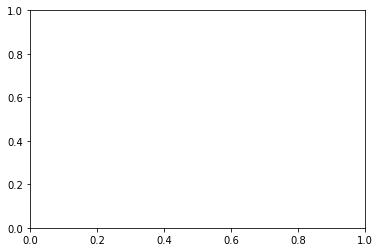

In [35]:
for i in range(10):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

ValueError: x and y must be the same size

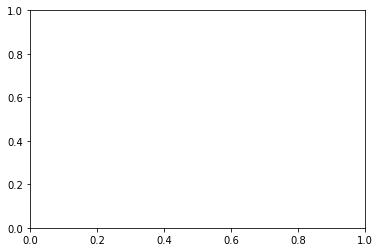

In [36]:
for i in range(10,20):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

ValueError: x and y must be the same size

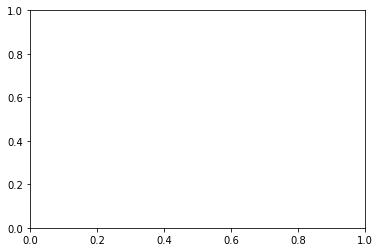

In [37]:
for i in range(20,30):
    matplotlib.pyplot.scatter(s814_pd[i][0], np.log(s814_pd[i][1]+1))

In [49]:
s814_pd = get_periodgram1(s814_adata)
s814_pd = s814_pd[:30]
s814_pd = [el[1][:15] for el in s814_pd]

print(s814_pd[0].shape)

print(s814_adata[0].shape)




(0, 1671)
(1, 1671)


[-3, -7, -4]
